## Set model parameters

In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
from nets_benchmarking import results_daa
warnings.filterwarnings('ignore') # suppresses warnings that arise because original code uses ...
# ... deprecated tf-version after first execution of cell 

normalscores = True
version = 'luigi'
at_loss_factor=1.0 
target_loss_factor=1.0
recon_loss_factor=1.0
kl_loss_factor=1.0
anneal = 0

# following lines set number of training and test points depending on version selected 
# to keep calculation times reasonable
if version in ['original','milena']:
    no_train, no_test = 1000,100
if version=='luigi':
    no_train, no_test = 100000,1000

## Collect Results

Try out the different models: 
- Decide with normalscores in the create_data function if data preprocessing takes place
- Choose with res_filename the filename under which your pickled data will be stored in folder results_collections
    -> if this file already exists, your newly collected results will be added
    -> if the file doesnt exist yet, a new one will be created
  the results that are collected last will be plotted first
- set the parameters version={'luigi','original','milena'}, at_loss_factor,target_loss_factor,
  recon_loss_factor,kl_loss_factor (all floats), and anneal={0,1} as you need them 

In [2]:
#for normalscores in [True,False]:
#for anneal in [0,1]:
#anneal = 1    
modelparams = [normalscores,
           version,at_loss_factor,target_loss_factor,
           recon_loss_factor,kl_loss_factor,anneal]

datadict = results_daa.create_data(no_train, no_test, normalscores)
res_filename = 'res_{}'.format(tuple(modelparams)) # 'more_res_{}'.format(tuple(modelparams))

#for i in range(10):
results_daa.collect_results(datadict,res_filename, 
                            version,at_loss_factor,target_loss_factor,
                            recon_loss_factor,kl_loss_factor,anneal)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4)            12          encoder_input_x[0][0]            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4)            20          dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 3)            15          dense_1[0][0]                    
____________________________________________________________________________________________

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
encoder_input_y (InputLayer)    [(None, 3)]          0                                            
__________________________________________________________________________________________________
encoder (Model)                 multiple             84          encoder_input_x[0][0]            
                                                                 encoder_input_y[0][0]            
__________________________________________________________________________________________________
decoder (Model)                 [(N

100000/100000 [==============================] - 1s 10us/sample - loss: 3.4995 - val_loss: 3.3548
Epoch 2/100
100000/100000 [==============================] - 0s 3us/sample - loss: 3.1992 - val_loss: 2.9542
Epoch 3/100
100000/100000 [==============================] - 0s 3us/sample - loss: 2.4567 - val_loss: 1.9444
Epoch 4/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.7938 - val_loss: 1.7034
Epoch 5/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.6521 - val_loss: 1.5975
Epoch 6/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.5519 - val_loss: 1.5060
Epoch 7/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.4186 - val_loss: 1.3041
Epoch 8/100
100000/100000 [==============================] - 0s 3us/sample - loss: 1.1125 - val_loss: 0.9612
Epoch 9/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.8414 - val_loss: 0.7630
Epoch 10/100
100000/100000 [==

100000/100000 [==============================] - 0s 2us/sample - loss: 0.3584 - val_loss: 0.3706
Epoch 76/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3581 - val_loss: 0.3646
Epoch 77/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3577 - val_loss: 0.3639
Epoch 78/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3569 - val_loss: 0.3636
Epoch 79/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3566 - val_loss: 0.3634
Epoch 80/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3566 - val_loss: 0.3631
Epoch 81/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3563 - val_loss: 0.3645
Epoch 82/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3559 - val_loss: 0.3659
Epoch 83/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3557 - val_loss: 0.3635
Epoch 84/100
100000/100

## Plot results

Plot the results of a file of collected results. 
To compare the results of copula transformation (=normalscores) and kl-annealing (=anneal), 
you can load the following five datafiles by setting res_filename to 
- res_(True, 'luigi', 1.0, 1.0, 1.0, 1.0, 0)    &    more_res_(True, 'luigi', 1.0, 1.0, 1.0, 1.0, 0)
- res_(False, 'luigi', 1.0, 1.0, 1.0, 1.0, 0)
- res_(True, 'luigi', 1.0, 1.0, 1.0, 1.0, 1)
- res_(False, 'luigi', 1.0, 1.0, 1.0, 1.0, 1)

luigi, loss-factors-all-1:
        errors(normalscores,anneal): (True,0):25%-30%, (True,1):70%, (False,0):50%, (False,1):90%

Copula Transformation: True
Parameters to the left indicate:
(version,at_loss_factor,target_loss_factor,recon_loss_factor,kl_loss_factor,anneal,repetition_number_# )

If no plot appears for 'reconstructed real space', please set ignore_color=True in results_daa.plot_results:


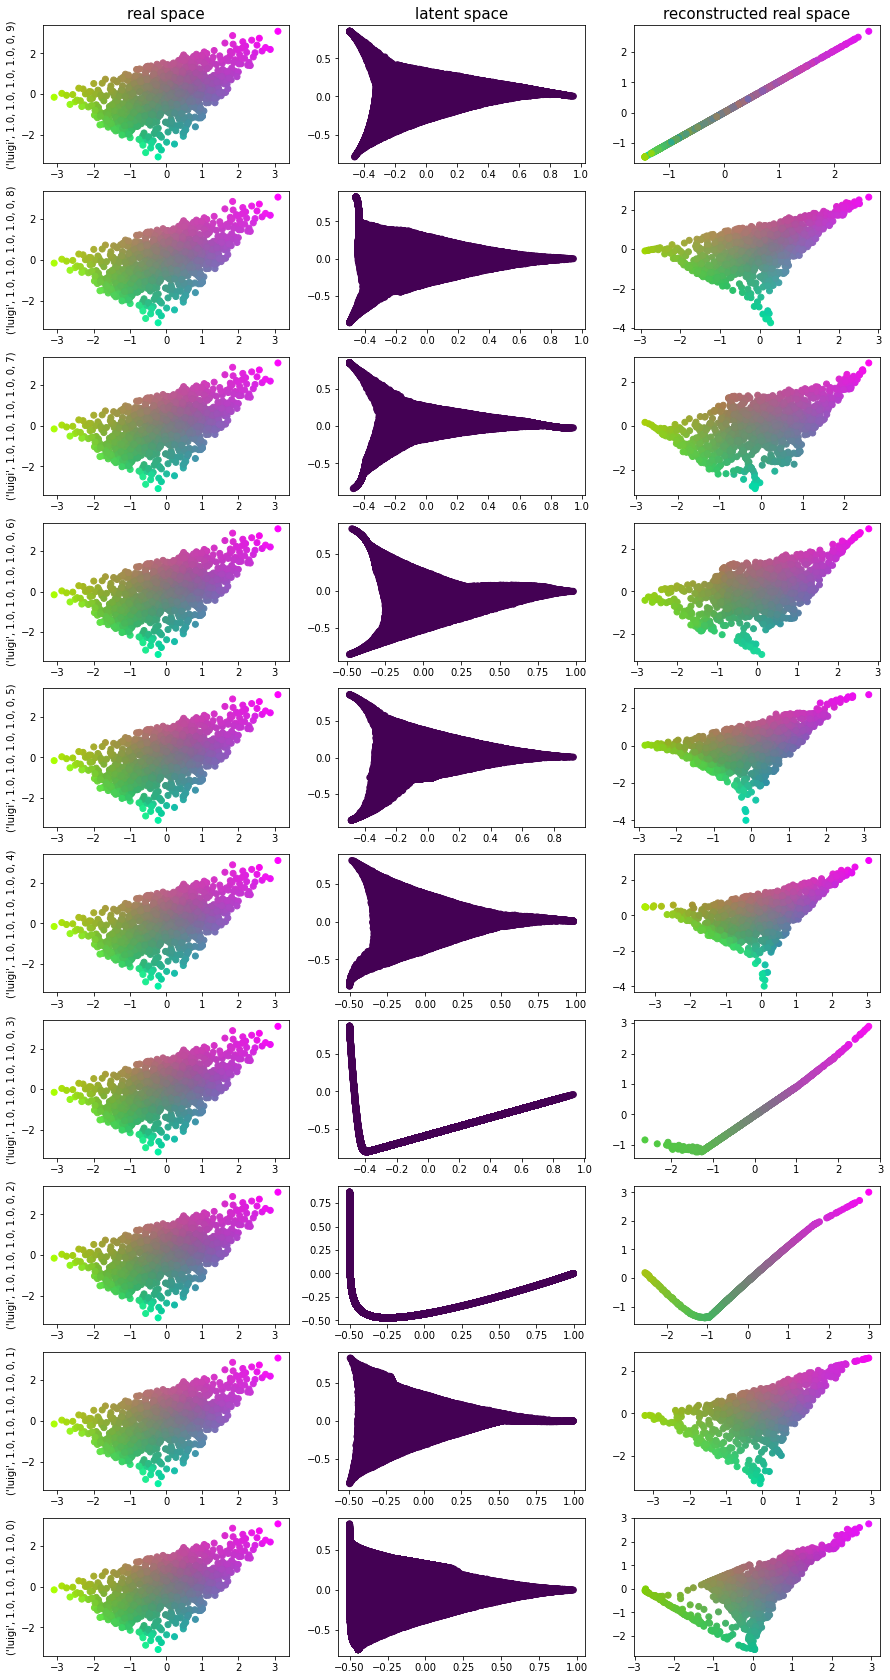

In [4]:
#normalscores = True
#anneal = 0
modelparams = [normalscores,
               version,at_loss_factor,target_loss_factor,
               recon_loss_factor,kl_loss_factor,anneal]

res_filename = 'res_{}'.format(tuple(modelparams))         
#res_filename = "res_(True, 'luigi', 1.0, 1.0, 1.0, 1.0, 0)"

print('''luigi, loss-factors-all-1:
        errors(normalscores,anneal): (True,0):25%-30%, (True,1):70%, (False,0):50%, (False,1):90%''')
print("")
print("\033[4mCopula Transformation:\033[0m {}".format(normalscores))
print("\033[4mParameters to the left indicate:\033[0m")
print("(version,at_loss_factor,target_loss_factor,recon_loss_factor,kl_loss_factor,anneal,repetition_number_# )")
print("")
print("\033[4mIf no plot appears for 'reconstructed real space', please set ignore_color=True in results_daa.plot_results\033[0m")
results_daa.plot_results(res_filename,ignore_color=False)